# PLAN

Going over the plan (and my sanity) of this project.


**PLAN**

1.) Get list of subreddits from redditlist.com

    1.1) Get url.
    1.2) Scrape it with BeautifulSoup.
    1.3) Clean it with regEx and Notepad++. (Lots of Notepad++ appearently.)
    1.4) Manually get through all of the subreddits to see whether content inside is video game related.
    1.5) Make it 100 subreddits because round numbers are nice.
    1.6) Display it as nicely as I can.

    Notes: Turns out almost half the list of redditlist.com is non-video game related.

2.) Make list of subreddit names for API query.

    2.1) Get subreddit url from 'Subreddit" column in 'subreddit_list.csv'
    2.2) De-HTTP it. (I wish there was a better word to describe the process.)
    2.3) Make a new list using 2.2) method.

3.) Test some APIs

    3.1) Look up endpoints and parameters.
    3.2) Test the parameters. (Lots of testing because the documentation is badly structured and written.)
    3.3) Do some test runs on 1 day worth of data.
    3.4) Do some test runs on 1 year worth of data.
    
    Notes: I realised that 1 year is a lot of time and the plan of doing 7 years for 100 subreddit is too much.

4.) Get the actual list of subreddits that we want to scrape.

    4.1) Just get 10. That's it.


# IMPORT MODULES AND DOWNLOAD STUFF

Things can get broken without these, y'know?

In [ ]:
# RUN THESE, VERY IMPORTANT

from bs4 import BeautifulSoup # webscraping
import requests # webscraping
import re # regex
import pandas as pd # displaying table
import datetime # dealing with date stuff
import json # read JSON
from tqdm import tqdm # for-loop iteration progress bar


In [ ]:
# RUN THESE, ALSO VERY IMPORTANT

!gdown --id 19poK5az5WbvSOiALEHYMlrzRQEeKryGK # subreddit_list.csv

Downloading...
From: https://drive.google.com/uc?id=19poK5az5WbvSOiALEHYMlrzRQEeKryGK
To: /content/subreddit_list.csv
100% 5.08k/5.08k [00:00<00:00, 1.89MB/s]


# GET LIST OF SUBREDDITS

Finally, some coding stuff. And a ~~bit~~ lot of elbow grease on Notepad++

In [ ]:
# URL HERE
url = "http://redditlist.com/sfw/category/gaming"

# SHOW STATUS
r = requests.get(url)
print("Status code: " + str(r.status_code))

# SOUPIFY
soup = BeautifulSoup(r.text)

# GENERATE UNCLEANED SUBREDDIT LIST
subreddit_unclean = open("subreddit_unclean.txt",'r+')

for link in soup.find_all('a'):
  subreddit_unclean.write(str(link.get('href')))
  subreddit_unclean.write('\n')

subreddit_unclean.close()

Status code: 200


**CLEANING OUTSIDE WITH NOTEPAD++ BECAUSE IT'S TOO MESSY**

Using replace function (Ctrl+H) on Notepad++.

Delete non http.
    
    *   find: ^(?!http://)\S+
    *   replace:

Delete empty lines.

    *   find: ^\n
    *   replace:








**MANUALLY CHECKING WHETHER THIS SUBREDDIT IS RELATED TO GAMING OR NOT**

Scope: The subreddit must mainly discuss about a single game or related franchise of games (e.g. r/assassinscreed is about various Assassin's Creed Games)

Total Subreddits Scraped: 103

Results: Deleted 23 Subreddits

    *   Deleted http://reddit.com/r/justneckbeardthings (not related)
    *   Deleted http://reddit.com/r/Yogscast (more than game discussions)
    *   Deleted http://reddit.com/r/TwoBestFriendsPlay (more than game discussions)
    *   Deleted http://reddit.com/r/marvelstudios (not related)
    *   Deleted http://reddit.com/r/gaybrosgonemild (not related)
    *   Deleted http://reddit.com/r/bisexual (not related)
    *   Deleted http://reddit.com/r/askgaybros (not related)
    *   Deleted http://reddit.com/r/amiibo (more than game discussions)
    *   Deleted http://reddit.com/r/stevenuniverse (not related)
    *   Deleted http://reddit.com/r/starterpacks (not related)
    *   Deleted http://reddit.com/r/AskReddit (not related)
    *   Deleted http://reddit.com/r/teenagers (not related)
    *   Deleted http://reddit.com/r/LivestreamFail (not related)
    *   Deleted http://reddit.com/r/Idubbbz (not related)
    *   Deleted http://reddit.com/r/SonicTheHedgehog (more than game discussions)
    *   Deleted http://reddit.com/r/Kappa (not related)
    *   Deleted http://reddit.com/r/Grimdank (more than game discussions)
    *   Deleted http://reddit.com/r/sales (not related)
    *   Deleted http://reddit.com/r/translator (not related)
    *   Deleted http://reddit.com/r/PewdiepieSubmissions (not related)
    *   Deleted http://reddit.com/r/grindr (not related)
    *   Deleted http://reddit.com/r/Pikabu (not related)
    *   Deleted http://reddit.com/r/Home (not related)

Update 1: Deleting non-video game specific subreddits. Deleted 23 Subreddits

    *   Deleted http://reddit.com/r/pokemon (more than game discussions)
    *   Deleted http://reddit.com/r/touhou (more than game discussions)
    *   Deleted http://reddit.com/r/pcmasterrace (general game related)
    *   Deleted http://reddit.com/r/Games (general game related)
    *   Deleted http://reddit.com/r/PS4 (general game related)
    *   Deleted http://reddit.com/r/xboxone (general game related)
    *   Deleted http://reddit.com/r/Steam (general game related)
    *   Deleted http://reddit.com/r/boardgames (board game related)
    *   Deleted http://reddit.com/r/3DS (general game related)
    *   Deleted http://reddit.com/r/nintendo (general game related)
    *   Deleted http://reddit.com/r/vita (general game related)
    *   Deleted http://reddit.com/r/gamecollecting (general game related)
    *   Deleted http://reddit.com/r/truegaming (general game related)
    *   Deleted http://reddit.com/r/retrogaming (general game related)
    *   Deleted http://reddit.com/r/playstation (general game related)
    *   Deleted http://reddit.com/r/ShouldIbuythisgame (general game related)
    *   Deleted http://reddit.com/r/DnDBehindTheScreen (board game related)
    *   Deleted http://reddit.com/r/gaming (general game related)
    *   Deleted http://reddit.com/r/gaymers (more than game discussions)
    *   Deleted http://reddit.com/r/NintendoSwitch (general game related)
    *   Deleted http://reddit.com/r/Warhammer (board game related)
    *   Deleted http://reddit.com/r/AndroidGaming (general game related)
    *   Deleted http://reddit.com/r/Warhammer40k (board game related)
























































**MANUALLY ADDING SUBREDDITS UP TO 100 SUBREDDITS BECAUSE ROUND NUMBERS ARE NICE**

Using 2020.10.17's top gaming subreddit communities list.

Results: Added 20 Subreddits

    *   Added http://reddit.com/r/FIFA/
    *   Added http://reddit.com/r/MortalKombat/
    *   Added http://reddit.com/r/thesims/
    *   Added http://reddit.com/r/destiny2/
    *   Added http://reddit.com/r/Warhammer40k/
    *   Added http://reddit.com/r/Competitiveoverwatch/
    *   Added http://reddit.com/r/RocketLeague/
    *   Added http://reddit.com/r/reddeadredemption/
    *   Added http://reddit.com/r/MagicArena/
    *   Added http://reddit.com/r/CrusaderKings/
    *   Added http://reddit.com/r/DaysGone/
    *   Added http://reddit.com/r/ClashOfClans/
    *   Added http://reddit.com/r/FortniteCompetitive/
    *   Added http://reddit.com/r/Eve/
    *   Added http://reddit.com/r/RimWorld/
    *   Added http://reddit.com/r/Brawlstars/
    *   Added http://reddit.com/r/StarWarsBattlefront/
    *   Added http://reddit.com/r/RedDeadOnline/
    *   Added http://reddit.com/r/fo76/
    *   Added http://reddit.com/r/Xcom/

Update 1: Added 23 Subreddits

    *   Added http://reddit.com/r/heroesofthestorm/
    *   Added http://reddit.com/r/forhonor/
    *   Added http://reddit.com/r/FUTMobile/
    *   Added http://reddit.com/r/Blackops4/
    *   Added http://reddit.com/r/Warframe/
    *   Added http://reddit.com/r/Stellaris/
    *   Added http://reddit.com/r/mw4/
    *   Added http://reddit.com/r/fivenightsatfreddys/
    *   Added http://reddit.com/r/FORTnITE/
    *   Added http://reddit.com/r/future_fight/
    *   Added http://reddit.com/r/AnthemTheGame/
    *   Added http://reddit.com/r/MLBTheShow/
    *   Added http://reddit.com/r/dauntless/
    *   Added http://reddit.com/r/BattlefieldV/
    *   Added http://reddit.com/r/ClashRoyale/
    *   Added http://reddit.com/r/Paladins/
    *   Added http://reddit.com/r/SWGalaxyOfHeroes/
    *   Added http://reddit.com/r/Mordhau/
    *   Added http://reddit.com/r/WorldofTanks/
    *   Added http://reddit.com/r/btd6/
    *   Added http://reddit.com/r/Seaofthieves/
    *   Added http://reddit.com/r/gtaonline/
    *   Added http://reddit.com/r/eu4/




































# GET TO KNOW OUR SUBREDDITS


Let's say hello to our selected 100 subreddits.

These subreddits will be our corpora.



In [ ]:
# DISPLAY TABLE USING PANDAS

pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
subreddit_table = pd.read_csv("subreddit_list.csv", encoding= 'unicode_escape')
subreddit_table

Downloading...
From: https://drive.google.com/uc?id=19poK5az5WbvSOiALEHYMlrzRQEeKryGK
To: /content/subreddit_list.csv
100% 5.08k/5.08k [00:00<00:00, 8.71MB/s]


,Subreddit,Game/Franchise
0,http://reddit.com/r/leagueoflegends,League of Legends
1,http://reddit.com/r/DestinyTheGame,Destiny Franchise
2,http://reddit.com/r/DotA2,DotA 2
3,http://reddit.com/r/smashbros,Super Smash Bros.
4,http://reddit.com/r/Minecraft,Minecraft
5,http://reddit.com/r/GlobalOffensive,Counter-Strike: Global Offensive
6,http://reddit.com/r/wow,World of Warcraft
7,http://reddit.com/r/hearthstone,Hearthstone
8,http://reddit.com/r/dayz,DayZ
9,http://reddit.com/r/Smite,Smite


# MAKING A LIST REFERENCING SUBREDDITS FOR API

Because full links are unnecessary for pushshift.io API

In [ ]:
# GET SUBREDDIT COLUMN FROM SUBREDDIT_LIST.CSV

old_subreddits = subreddit_table["Subreddit"].to_list()

# REGEX MATCH HTTP

dehttp = re.compile(r'http:\/\/reddit\.com\/r\/(\w+)') # matches http://reddit.com/r/(group1)/

# NEW LIST WITHOUT HTTP

new_subreddits = []

for subreddit in old_subreddits:
  new_subreddit = re.match(dehttp, subreddit)
  new_subreddits.append(new_subreddit.group(1))

new_subreddits

['leagueoflegends',
 'DestinyTheGame',
 'DotA2',
 'smashbros',
 'Minecraft',
 'GlobalOffensive',
 'wow',
 'hearthstone',
 'dayz',
 'Smite',
 'runescape',
 'pathofexile',
 '2007scape',
 'Guildwars2',
 'EliteDangerous',
 'ffxiv',
 'Warthunder',
 'AnimalCrossing',
 'totalwar',
 'Terraria',
 'swtor',
 'CoDCompetitive',
 'darksouls',
 'feedthebeast',
 'assassinscreed',
 'fireemblem',
 'osugame',
 'NBA2k',
 'TownofSalemgame',
 'dwarffortress',
 'RotMG',
 'forza',
 'bloodborne',
 'CitiesSkylines',
 'Overwatch',
 'playark',
 'Fallout',
 'starcitizen',
 'DBZDokkanBattle',
 'csgo',
 'Rainbow6',
 'pokemongo',
 'StardewValley',
 'TheSilphRoad',
 'Granblue_en',
 'residentevil',
 'gwent',
 'Breath_of_the_Wild',
 'PUBATTLEGROUNDS',
 'FortNiteBR',
 'DDLC',
 'classicwow',
 'apexlegends',
 'borderlands3',
 'RocketLeagueEsports',
 'AnotherEdenGlobal',
 'FireEmblemThreeHouses',
 'MarioKartTour',
 'FIFA',
 'MortalKombat',
 'thesims',
 'destiny2',
 'Competitiveoverwatch',
 'RocketLeague',
 'reddeadredemptio

# ~~MAKING FUNCTION GENERATE LIST OF DATES FOR API~~

~~I don't want to write dates manually. That's just bad practice.~~

Turns out I don't need this since I can just use UNIX Timestamp which is much easier to implement, then convert it to much digestable date format.

In [ ]:
# DEFINE MAKEDATES FUNCTION (IM NOT SURE IF I'LL USE THIS)

def makedates(year, month): # Generate list of dates from 'YEAR-MO-01' to '2020-10-01'

  date_list = []

  while '2020-10-01' not in date_list:
    d = datetime.datetime(year, month, 1)
    date_list.append(str(d.date()))
    month += 1
    if month == 13:
      month = 1
      year += 1

  return date_list

# TEST (IT JUST WORKS -TODD HOWARD, 2015.)
makedates(2014, 1)

['2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01',
 '2014-07-01',
 '2014-08-01',
 '2014-09-01',
 '2014-10-01',
 '2014-11-01',
 '2014-12-01',
 '2015-01-01',
 '2015-02-01',
 '2015-03-01',
 '2015-04-01',
 '2015-05-01',
 '2015-06-01',
 '2015-07-01',
 '2015-08-01',
 '2015-09-01',
 '2015-10-01',
 '2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01',
 '2017-01-01',
 '2017-02-01',
 '2017-03-01',
 '2017-04-01',
 '2017-05-01',
 '2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-

# API TEST

Let's test the APIs before committing.

In [ ]:
url = "https://api.pushshift.io/reddit/comment/search/?subreddit=2007scape&after=1603065600&before=1603066200&size=100"

r = requests.get(url)

result = json.loads(r.text)

for s in result['data']:
  print(s['body'])
  print('---')

See that? That's the trap you jest fell into.
---
Id rather be that bird and take the probability your little wee wee wont penetrate.
---
&gt;people blaming her have no basis to

We're not blaming her so much as not trusting him. We have every reason to not trust him. He's a proven liar.
---
Seems worth to speed slayer up though imo
---
Hammering an eel, is that what the kids are calling it these days?
---
Micropenis pride.
---
Cute? Kill this fucker before he messes up your grass. Took us months to solve out mole problem.
---
Underground Pass is the quest you'll need to do. I highly suggest it.


Ibans is good for a very long time. There are some that even use Ibans for Zulrah and the likes until they can get Trident or better gear.
---
I just rub the tip between the lips. It works for me. The ladies love it
---
[removed]
---
Nice of you to make this picture of Theoatrix
---
Nah he said he died at a place he couldn’t have possibly died at so everyone would be like wtf and be against h

Notes: so API has call limit of 100 results per query... that is a big problem

I'm thinking of calling every 10 minutes worth of comments per 1 query. That "should" not exceed 100 results. Huge emphasis on "should", but I wouldn't worry too much if comments got lost since there's so many anyway.

My rough calculation is that from year 2014 to 2020 it will take around 96 hours to get one subreddit worth of data. Assuming we call 10 minutes worth of comments per 1 second. That is still lot of time.

But the only way to proof that calculation is true is to actually do it, so let's do it, I guess...

1 day first, then try 1 year.


In [ ]:
# 1 DAY DATA

endpoint = "https://api.pushshift.io/reddit/comment/search/"

# 1577836800 is 2020-01-01

initutc = 1546300800 # 2019-01-01 in UNIX
finalutc = initutc + 600 # + 10 minutes

# CONVERT UNIX TO DATE

d = datetime.datetime.fromtimestamp(initutc)

# CREATE FILE

corpus = open("2007scape_"+str(d.date())+".txt",'w')

for i in tqdm(range(144)): # 2019-01-01 - 2019-01-02
  query = "?subreddit=2007scape&after="+str(initutc)+"&before="+str(finalutc)+"&size=100"
  url = endpoint+query
  r = requests.get(url)

  # 10 MINUTE INCREMENT

  initutc = finalutc
  finalutc = initutc + 600

  # JUST IN CASE SOMETHING IS BORKED

  try:
    result = json.loads(r.text)
  except:
    pass

  # WRITE IN FILE

  for s in result['data']:
    corpus.write(s['body'])
    corpus.write('\n')
    corpus.write('---')
    corpus.write('\n')

corpus.close()


100%|██████████| 144/144 [00:33<00:00,  4.28it/s]


Okay. 30 seconds, that's not so bad.

In [ ]:
# 1 YEAR DATA

# API ENDPOINT

endpoint = "https://api.pushshift.io/reddit/comment/search/"

# TARGETTED SUBREDDIT
# subreddit_list = ['2007scape','classicwow','Guildwars2','Eve','fo76','hearthstone','BrawlStars','destiny2','deadbydaylight','Rainbow6']

# SET SUBREDDIT
subreddit = "fo76"

# SET INITIAL DATE IN UNIX TIMESTAMP

initutc = 1546300800 # 2019-01-01
finalutc = initutc + 600 # + 10 minutes

# ITERATE FOR 1 YEAR

for i in tqdm(range(365)): # 365 days in 1 year

  # CONVERT UNIX TO DATE

  d = datetime.datetime.fromtimestamp(initutc)

  # CREATE WRITE FILE

  corpus = open(subreddit+"_"+str(d.date())+".txt","w")

  # COLLECT DATA FOR 1 DAY

  for i in range(144): # 144 * 10 min = 1 day
    query = "?subreddit="+subreddit+"&after="+str(initutc)+"&before="+str(finalutc)+"&size=100"
    url = endpoint+query
    r = requests.get(url)

    # ADD 10 MINUTE INCREMENT FOR NEXT FOR-LOOP

    initutc = finalutc
    finalutc = initutc + 600

    # JUST IN CASE IF SOMETHING IS BORKED

    try:
      result = json.loads(r.text)
    except:
      pass

    # WRITE IN FILE

    for s in result['data']:
      corpus.write(s['body'])
      corpus.write('\n')
      corpus.write('---')
      corpus.write('\n')

  # CLOSE FILE

  corpus.close()


100%|██████████| 1/1 [01:31<00:00, 91.14s/it]


In [ ]:
!zip -r /content/fo76.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2020.11.13/ (stored 0%)
  adding: content/.config/logs/2020.11.13/17.33.07.342211.log (deflated 54%)
  adding: content/.config/logs/2020.11.13/17.33.44.836274.log (deflated 55%)
  adding: content/.config/logs/2020.11.13/17.33.45.553060.log (deflated 53%)
  adding: content/.config/logs/2020.11.13/17.32.45.071309.log (deflated 92%)
  adding: content/.config/logs/2020.11.13/17.33.29.478721.l

3 to 8 hours if lucky, 30 hours if the server is borked. Oh dear...

# AND THEN THE SUDDEN REALIZATION HITS ME...

...

That 7 years is ~~a bit~~ excessive, also 100 sebreddits as well.

I'm thinking of only scraping 2019-2020 and much fewer subreddits.
There're already thousands of comment each day, so a year is like... a lot.

10 subreddits should be enough. Hopefully.

Also, I can't scrape data on colab because once colab gets runtime error everything is lost. I have to let the code run on my local machine which is going to take much longer, but at least I'll have some safety that the work won't get lost.

I'll still keep updated on this notebook though, and copy codes from my local machine.

# MORE PROBLEMS ON CORPUS AND THE "ELEGANT" SOLUTION

Yeah, big surpises I'm sure.

Also the "elegant" part wasn't sarcasm, it's pretty genius.

So we got a problem...

All of the texts are duped. Meaning that one line of text can appear more than once.

The worst part of it was the duplication was inconsistent

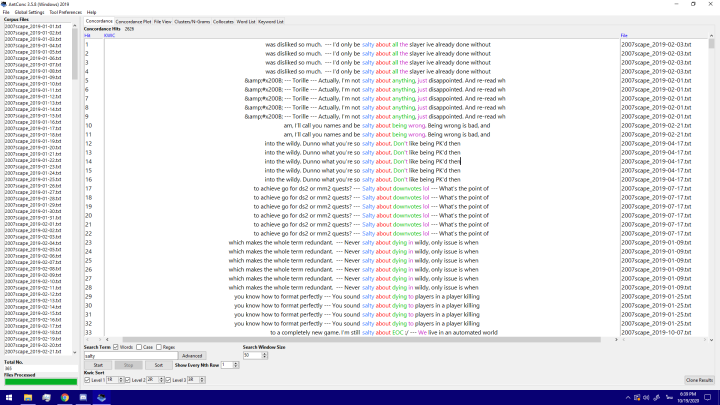


Which it means that the problem wasn't from the code, but rather the API.

Trust me. If it was from the code, the duplication would be consistent.

So, I have to ~~write a little script~~ edit a little script from StackOverFlow. (this one right here: https://stackoverflow.com/questions/1215208/how-might-i-remove-duplicate-lines-from-a-file)

Initially I was going to do this on Unix, but since we do everything on Python now, we might as well write it in Python.

So here's the little script.

Disclaimer: This code probably won't work on this notebook since I did this on local computer and copied it.

In [ ]:
# TARGETTED SUBREDDIT

subreddit = "2007scape"

# EMPTY LIST PLACEHOLDER FOR ITERATION THROUGH ALL FILES

list_filenameold = []
list_filenamenew = []

# SETTING UP DATES IN FILE NAME

initutc = 1546300800 # 2019-01-01 in UNIX
finalutc = initutc + 86400 # + 1 day

# ITERATE THROUGH FOR LIST OF FILE NAMES

for i in range(365): # 1 year
  d = datetime.datetime.fromtimestamp(initutc)
  list_filenameold.append(subreddit+"_"+str(d.date())+".txt")
  list_filenamenew.append(subreddit+"_"+str(d.date())+"_nodupe.txt")
  initutc = finalutc
  finalutc = initutc + 86400

# ITERATE THROUGH FOR REMOVING DUPLICATE LINES IN FILES

for outfilename,infilename in zip(list_filenamenew,list_filenameold):
  lines_seen = set() # very genius way of storing unique lines, since elements in set is always unique.
  outfile = open("/"+subreddit+"_nodupe/"+outfilename, "w", encoding="utf-8") # specify encoding because my computer is too borked not to assume it's utf-8
  for line in open("/"+subreddit+"/"+infilename, "r", encoding="utf-8"): # specify encoding because my computer is too borked not to assume it's utf-8
    if line not in lines_seen:
      outfile.write(line) # write a line
      outfile.write('---')
      outfile.write('\n')
      lines_seen.add(line) # store in set
  outfile.close()